REGRESIÓN LINEAL

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Generar datos aleatorios

In [4]:
np.random.seed(42) # semilla del generador de datos
x = np.random.uniform(50, 150, 100) 
y = 3 * x + 20 + np.random.normal(0, 15, 100)

Convertir datos a un DF

In [5]:
import pandas as pd
data = pd.DataFrame({'Tamaño': x, 'Precio': y})
data.head()

,Tamaño,Precio
0,87.454012,283.667742
1,145.071431,450.729182
2,123.199394,390.974594
3,109.865848,319.784012
4,65.601864,213.510514


Visualizamos los datos

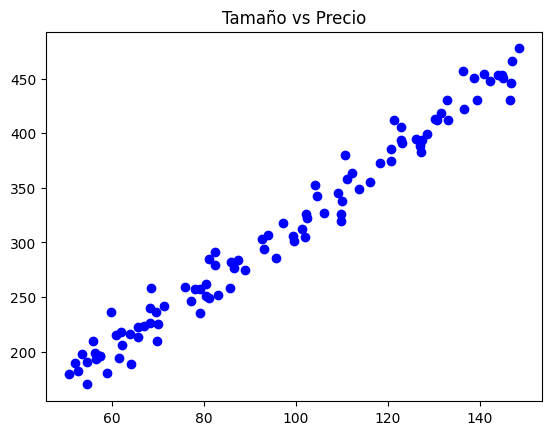

In [6]:
plt.Figure(figsize=(10, 10))
plt.scatter(data['Tamaño'], data['Precio'], color='blue', label='Datos reales')
plt.title('Tamaño vs Precio')
plt.show()

Dividimos el dataframe, estrategia 80-20

In [7]:
X = data[['Tamaño']] # variable independiente
Y = data['Precio'] # variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Ajustar el modelo lineal

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train) # ajuste del modelo
y_pred = model.predict(X_test) # predicción

print("Coeficiente:", model.coef_[0])
print("Intercepto:", model.intercept_)

Coeficiente: 2.9397970972440826
Intercepto: 25.153844929674392


Calculo de metricas

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación R^2:", r2)

Error cuadrático medio (MSE): 147.08239058632543
Coeficiente de determinación R^2: 0.9825431689004598


Visualización de predicciones

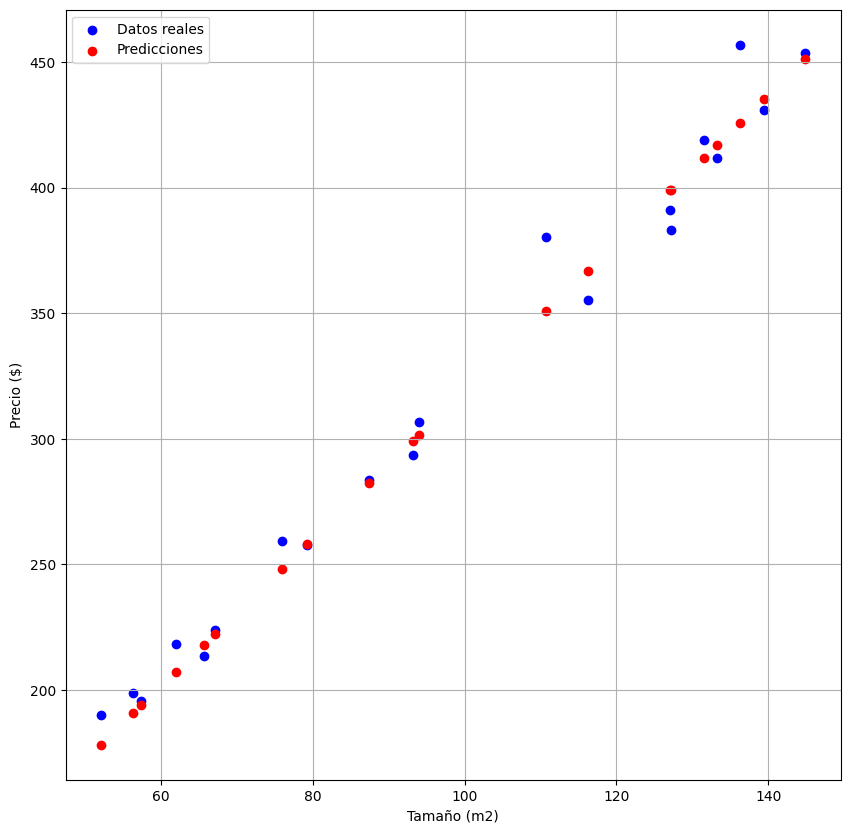

In [10]:
plt.figure(figsize=(10, 10))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Tamaño (m2)')
plt.ylabel('Precio ($)')
plt.legend()
plt.grid()
plt.show()

DATOS SIMULADOS

In [11]:
from sklearn.datasets import fetch_california_housing
import seaborn as sns

casas = fetch_california_housing()
data_casa = pd.DataFrame(casas.data, columns=casas.feature_names)
data_casa['HouseValue'] = casas.target
data_casa.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Visualización y EDAS

<Axes: xlabel='HouseValue', ylabel='Count'>

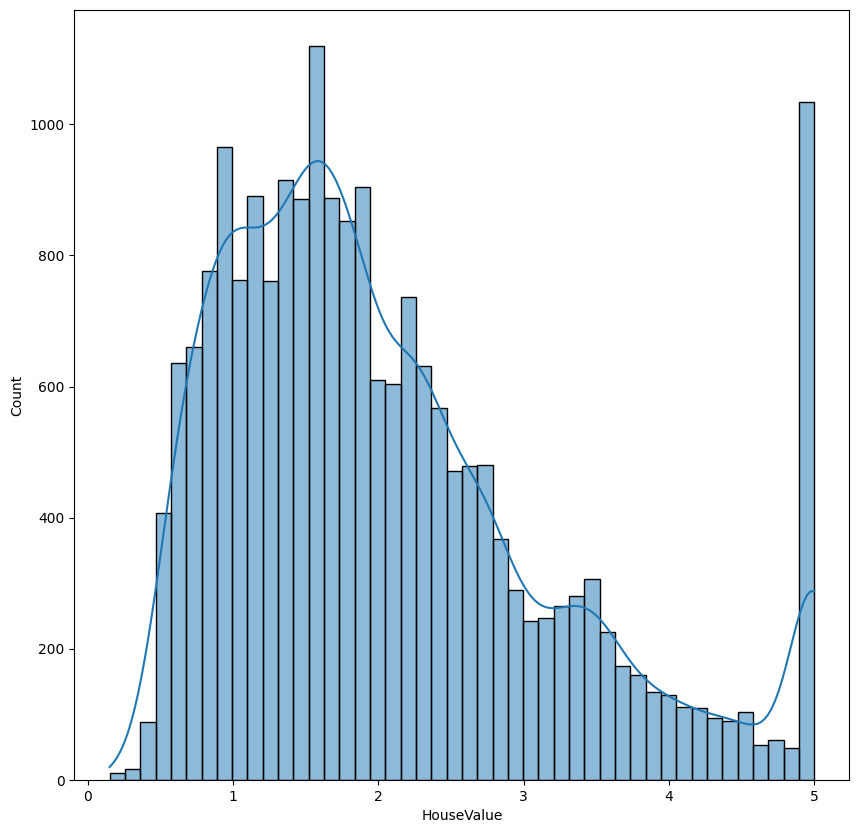

In [12]:
data_casa.describe()
plt.figure(figsize=(10, 10))
sns.histplot(data_casa['HouseValue'], kde=True)

<Axes: >

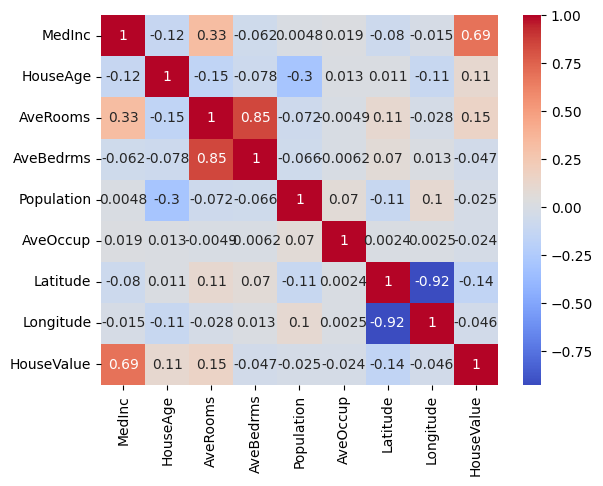

In [13]:
sns.heatmap(data_casa.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='AveRooms', ylabel='HouseValue'>

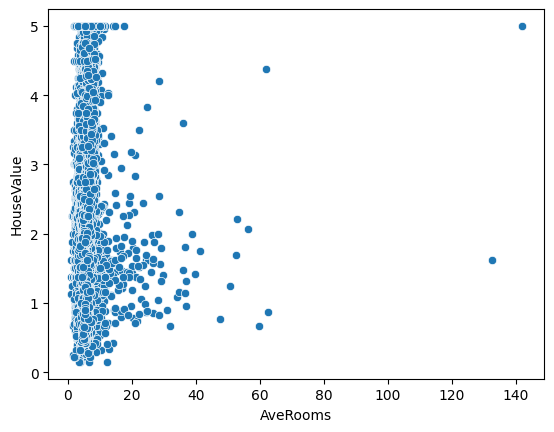

In [14]:
sns.scatterplot(x=data_casa['AveRooms'], y=data_casa['HouseValue'])

In [15]:
data_casa = data_casa.dropna() # eliminar filas con valores nulos

Definición de datos atipicos

In [16]:
def drop_atipicos(data, atributo):
    prom = data[atributo].mean()
    desv = data[atributo].std()
    lim_inf = prom - 3 * desv
    lim_sup = prom + 3 * desv
    return data[(data[atributo] >= lim_inf) & (data[atributo] <= lim_sup)]

Eliminar los valores atipicos

In [17]:
for col in data_casa.columns:
    data_casa = drop_atipicos(data_casa, col)

crear variables de entrenamiento y objetivo

In [18]:
x = data_casa[['AveRooms']]
y = data_casa['HouseValue']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train) # ajuste del modelo
y_pred = model.predict(X_test) # predicción

print("Coeficiente:", model.coef_[0])
print("Intercepto:", model.intercept_)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación R^2:", r2)

Coeficiente: 0.29042939309325594
Intercepto: 0.5239882635481341
Error cuadrático medio (MSE): 1.1226526751632029
Coeficiente de determinación R^2: 0.07318814838889887


Visualizar

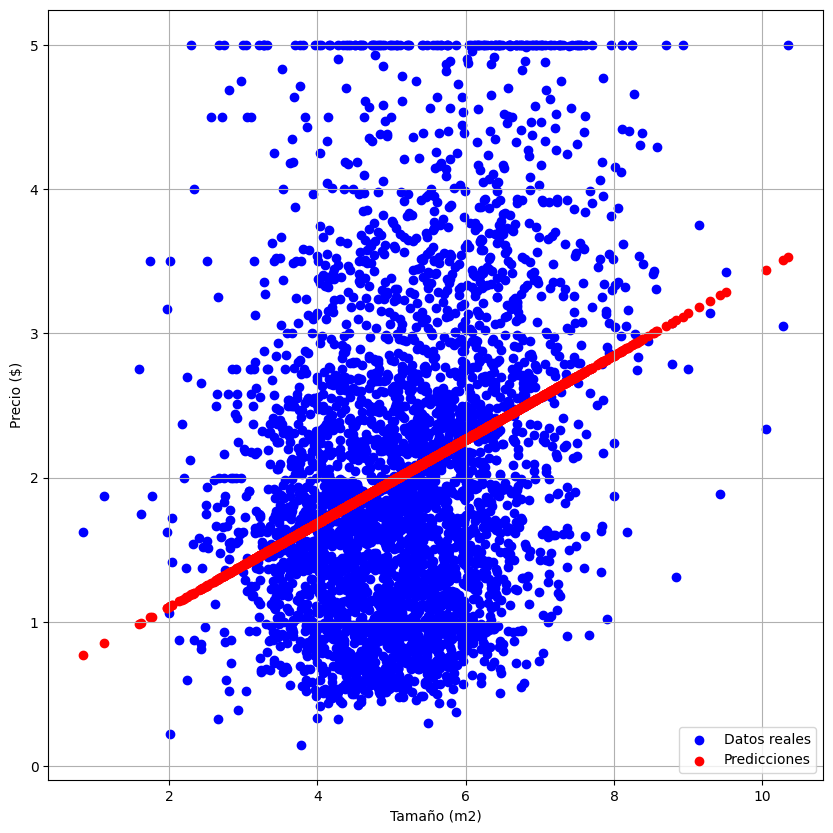

In [19]:
plt.figure(figsize=(10, 10))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Tamaño (m2)')
plt.ylabel('Precio ($)')
plt.legend()
plt.grid()
plt.show()

REGRESIÓN LOGISTICA

Generar datos

In [20]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

x,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_repeated=0, random_state=42)

Visualización

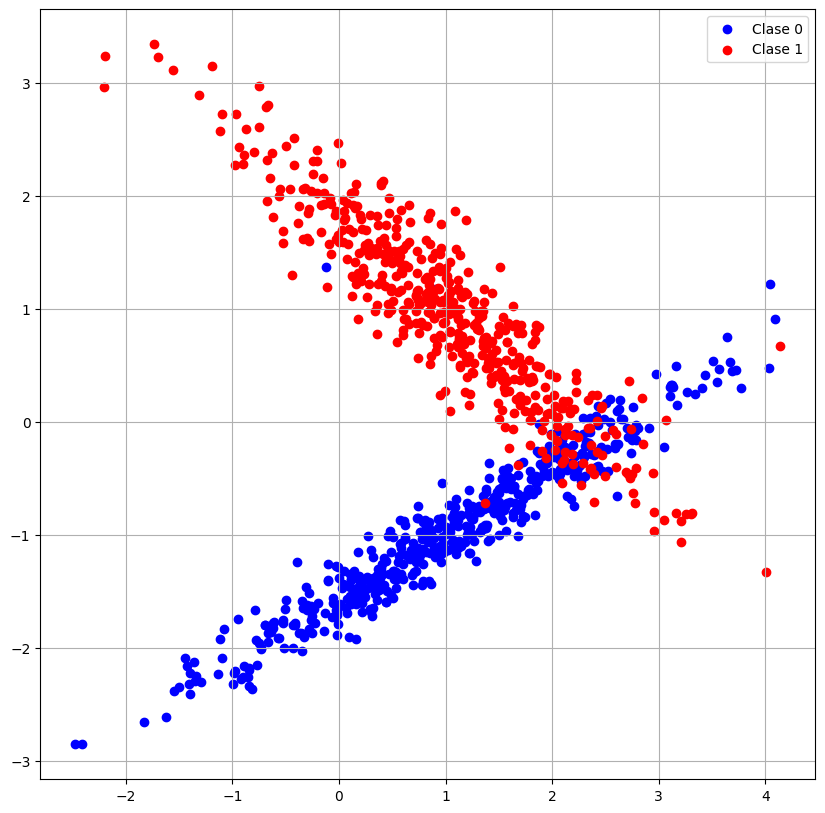

In [21]:
plt.figure(figsize=(10, 10))
plt.scatter(x[y==0][:,0], x[y==0][:,1], color='blue', label='Clase 0')
plt.scatter(x[y==1][:,0], x[y==1][:,1], color='red', label='Clase 1')
plt.legend()
plt.grid()
plt.show()

Preparar los datos

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Añadir terminos de intersección

In [23]:
x_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
x_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

Regresión logistica

In [24]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.cost_history = []

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _compute_cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        # Inicializar pesos
        self.weights = np.zeros(X.shape[1])

        for _ in range(self.n_iterations):
            # Propagación
            z = np.dot(X, self.weights)
            h = self._sigmoid(z)

            # Cálculo de costo
            cost = self._compute_cost(h, y)
            self.cost_history.append(cost)

            # Actualización de pesos (descenso de gradiente)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.weights -= self.learning_rate * gradient

        return self

    def predict_proba(self, X):
        return self._sigmoid(np.dot(X, self.weights))

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

Llamar a la función

Text(0.5, 0, 'Iteraciones')

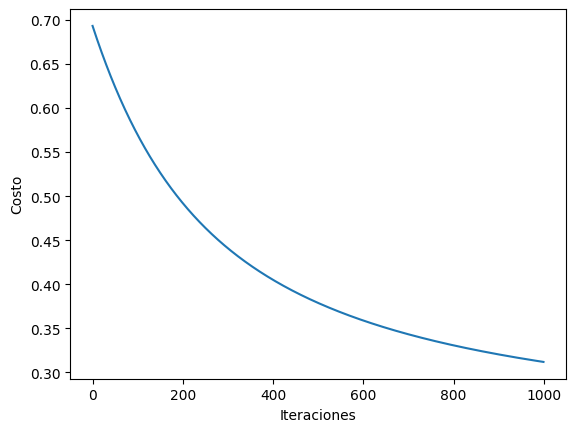

In [25]:
model = LogisticRegression(learning_rate=0.01, n_iterations=1000)
model.fit(x_train, y_train)

plt.plot(model.cost_history)
plt.ylabel('Costo')
plt.xlabel('Iteraciones')

Metricas

In [26]:
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)


from sklearn.metrics import confusion_matrix, roc_curve, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, classification_report

print('Acurracy:', accuracy_score(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_proba))
print('Matriz de confusión:\n', confusion_matrix(y_test, y_pred))
print('classificación report:' , classification_report(y_test, y_pred))

Acurracy: 0.895
AUC: 0.951923076923077
Matriz de confusión:
 [[97  7]
 [14 82]]
classificación report:               precision    recall  f1-score   support

           0       0.87      0.93      0.90       104
           1       0.92      0.85      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200



Visualizar la frontera de decisión

In [37]:
def frontera_de_decision(X, y, model):
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    # Añadir el término de intersección a la cuadrícula
    grid = np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()]
    
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 1], X[:, 2], c=y, edgecolors='k', marker='o', s=100, cmap='coolwarm')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Frontera de decisión')
    plt.show()

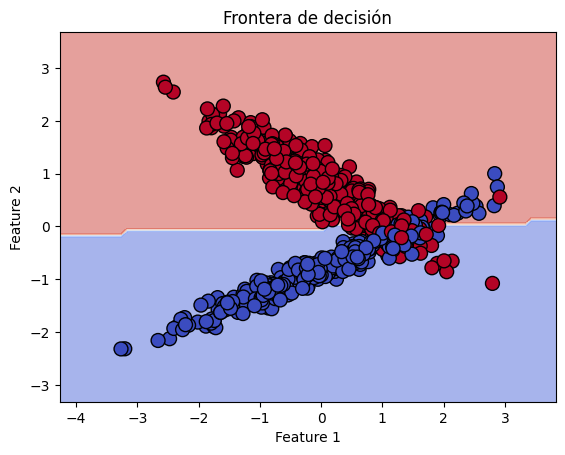

In [38]:
frontera_de_decision(x_train, y_train, model)

Utilizar y comparar la regresión logistica de sklearn

In [39]:
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

In [47]:
sk_model = SKLogisticRegression()
sk_model.fit(X_train, y_train)
y_pred_sk = sk_model.predict(X_test)

print('Acurracy:', accuracy_score(y_test, y_pred_sk))
print('coeficiente:', sk_model.coef_[0])
print('intercepto:', sk_model.intercept_[0])

Acurracy: 0.9
coeficiente: [-0.53194211  4.00026865]
intercepto: 0.6301295765159568
